<a href="https://colab.research.google.com/github/aaril011/Praktikum_PCD/blob/main/modul4_pcd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('/content/apel.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
# Laplacian
laplacian = cv2.Laplacian(gray_img, cv2.CV_64F)
laplacian_abs = cv2.convertScaleAbs(laplacian)

In [4]:
# Roberts
roberts_kernel_x = np.array([[1, 0], [0, -1]])
roberts_kernel_y = np.array([[0, 1], [-1, 0]])
roberts_x = cv2.filter2D(gray_img, -1, roberts_kernel_x)
roberts_y = cv2.filter2D(gray_img, -1, roberts_kernel_y)
roberts = cv2.addWeighted(roberts_x, 0.5, roberts_y, 0.5, 0)


In [5]:
# Prewitt
prewitt_kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
prewitt_x = cv2.filter2D(gray_img, -1, prewitt_kernel_x)
prewitt_y = cv2.filter2D(gray_img, -1, prewitt_kernel_y)
prewitt = cv2.addWeighted(roberts_x, 0.5, prewitt_y, 0.5, 0)

In [6]:
# Sobel
sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

In [7]:
#Canny
canny = cv2.Canny(img, 100, 200)

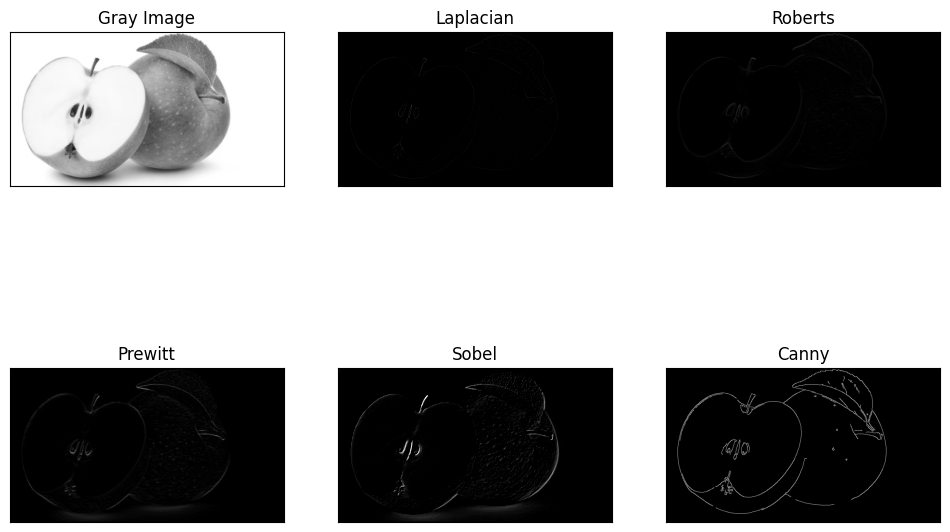

In [8]:
#Menampilkan Gambar
titles = ['Gray Image', 'Laplacian', 'Roberts', 'Prewitt', 'Sobel', 'Canny']
images = [gray_img, laplacian, roberts, prewitt, sobel, canny]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.subplots_adjust(wspace=0.2, hspace=0.2)

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray', vmin=0, vmax=255)  # Menggunakan cmap='gray', dan vmin/vmax disesuaikan
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()